In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
le = LabelEncoder()

In [2]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18363
machine          : AMD64
processor        : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : 0.29.24
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: None
bs4              : 4.10.0
bottleneck       : 1.3.2
fsspec  

In [3]:
data_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                       names = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"])

In [4]:
data_raw.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
data_raw.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


array([[<AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A8'}>],
       [<AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A15'}>]], dtype=object)

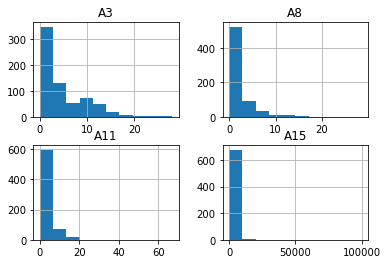

In [7]:
data_raw.hist()

In [8]:
print(data_raw.isnull().values.any())

False


In [9]:
train_data,test_data = train_test_split(data_raw,test_size = 0.2, random_state=32)

In [10]:
data_raw.head(100)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,00171,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,00180,1,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
98,a,22.50,11.000,y,p,q,v,3.000,t,f,0,t,g,00268,0,-


In [11]:
output_raw = data_raw["A16"]
data_raw.drop("A16",axis=1)
output_raw.head()

0    +
1    +
2    +
3    +
4    +
Name: A16, dtype: object

In [12]:
data_raw.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [13]:
data_raw.A1.unique()

array(['b', 'a', '?'], dtype=object)

In [14]:
data_raw.A2.unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [15]:
data_raw.A3.unique()

array([ 0.   ,  4.46 ,  0.5  ,  1.54 ,  5.625,  4.   ,  1.04 , 11.585,
        4.915,  0.83 ,  1.835,  6.   ,  6.04 , 10.5  ,  4.415,  0.875,
        5.875,  0.25 ,  8.585, 11.25 ,  1.   ,  8.   , 14.5  ,  6.5  ,
        0.585, 13.   , 18.5  ,  8.5  , 14.79 ,  9.79 ,  7.585,  5.125,
       10.75 ,  1.5  ,  1.585, 11.75 ,  9.415,  9.17 , 15.   ,  1.415,
       13.915, 28.   ,  6.75 ,  2.04 ,  0.665,  2.5  ,  3.   , 11.625,
        4.5  , 12.25 , 16.165,  0.79 ,  0.835,  4.25 ,  0.375, 25.125,
        7.5  ,  5.   ,  7.   ,  5.29 ,  1.165,  9.75 , 19.   ,  3.5  ,
        0.625,  2.21 , 12.75 , 15.5  ,  1.375,  3.54 , 11.   ,  1.75 ,
       16.5  , 12.   ,  2.25 ,  0.75 , 12.5  ,  1.25 ,  1.125,  7.04 ,
       10.335,  6.21 ,  6.665,  9.   ,  5.5  ,  0.54 ,  2.75 ,  9.5  ,
       13.5  ,  3.75 , 16.   ,  0.29 ,  1.665,  7.54 ,  0.46 , 10.   ,
       11.5  ,  3.04 ,  2.   ,  0.08 ,  1.71 ,  3.25 ,  2.54 , 13.585,
        8.665,  9.25 ,  8.17 ,  2.335, 19.5  ,  5.665,  4.625,  0.205,
      

In [16]:
data_raw.A4.unique()

array(['u', 'y', '?', 'l'], dtype=object)

In [17]:
data_raw.A5.unique()

array(['g', 'p', '?', 'gg'], dtype=object)

In [18]:
data_raw.A6.unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', '?'], dtype=object)

In [19]:
data_raw.A7.unique()

array(['v', 'h', 'bb', 'ff', 'j', 'z', '?', 'o', 'dd', 'n'], dtype=object)

In [20]:
data_raw.A8.unique()

array([ 1.25 ,  3.04 ,  1.5  ,  3.75 ,  1.71 ,  2.5  ,  6.5  ,  0.04 ,
        3.96 ,  3.165,  2.165,  4.335,  1.   ,  5.   ,  0.25 ,  0.96 ,
        3.17 ,  0.665,  0.75 ,  0.835,  7.875,  3.085,  0.5  ,  5.165,
       15.   ,  7.   ,  5.04 ,  7.96 ,  7.585,  0.415,  2.   ,  1.835,
       14.415,  4.5  ,  5.335,  8.625, 28.5  ,  2.625,  0.125,  6.04 ,
        3.5  ,  0.165,  0.875,  1.75 ,  0.   ,  7.415,  0.085,  5.75 ,
        6.   ,  3.   ,  1.585,  4.29 ,  1.54 ,  1.46 ,  1.625, 12.5  ,
       13.5  , 10.75 ,  0.375,  0.585,  0.455,  4.   ,  8.5  ,  9.46 ,
        2.25 , 10.   ,  0.795,  1.375,  1.29 , 11.5  ,  6.29 , 14.   ,
        0.335,  1.21 ,  7.375,  7.5  ,  3.25 , 13.   ,  5.5  ,  4.25 ,
        0.625,  5.085,  2.75 ,  2.375,  8.   ,  1.085,  2.54 ,  4.165,
        1.665, 11.   ,  9.   ,  1.335,  1.415,  1.96 ,  2.585,  5.125,
       15.5  ,  0.71 ,  5.665, 18.   ,  5.25 ,  8.665,  2.29 , 20.   ,
        2.46 , 13.875,  2.085,  4.58 ,  2.71 ,  2.04 ,  0.29 ,  4.75 ,
      

In [21]:
data_raw.A9.unique()

array(['t', 'f'], dtype=object)

In [22]:
data_raw.A10.unique()

array(['t', 'f'], dtype=object)

In [23]:
data_raw.A11.unique()

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19], dtype=int64)

In [24]:
data_raw.A12.unique()

array(['f', 't'], dtype=object)

In [25]:
data_raw.A13.unique()

array(['g', 's', 'p'], dtype=object)

In [26]:
data_raw.A14.unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '?', '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [27]:
data_raw.A15.unique()

array([     0,    560,    824,      3,  31285,   1349,    314,   1442,
          200,   2690,    245,   1208,   1260,     11,  10000,   5000,
         4000,     35,    713,    551,    500,    300,    221,   2283,
          100,     15,    284,   1236,   5800,    730,    400,  50000,
          456,  15108,   2954,      2,     20,     27,    225,      1,
           38,      5,    130,    147,    210,  11202,   1332,     50,
          258,    567,   1000,   2510,    809,    610,    150,  51100,
          367,    600,    247,    375,    278,    827,   2072,    582,
         2300,   3065,   2200,      6,   1602,   2184,   3376,   2000,
         7544,  10561,    837,  11177,    639,   2028,   1065,    540,
          158,  15000,   3000,   3257,   1655,   1430,      7,    790,
          396,    678,   1187,   6590,    168,   1270,   1210,    742,
         8851,   7059,   1704,    857,   6700,   2503,   9800,    196,
           14,  26726,  18027,     99,    444,   1200,   2010,     13,
      

In [28]:
data_raw.A16.unique()

array(['+', '-'], dtype=object)

In [29]:
df_a1 = data_raw.A1.map({'b':1,'a':0,'?': math.nan})
print(df_a1.isnull().values.sum())

12


In [30]:
df_a2 = pd.to_numeric(data_raw['A2'],errors='coerce')
df_a2.head()

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
Name: A2, dtype: float64

In [31]:
df_a2.isnull().sum()

12

In [32]:
df_a4 = data_raw.A4.map({'u':1,'1':0,'y':2,'?': math.nan})
print(df_a4.isnull().values.sum())

8


In [33]:
df_a5 = data_raw.A5.map({'g':0,'p':1,'gg':2,'?': math.nan})
print(df_a5.isnull().values.sum())
df_a5.head()

6


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: A5, dtype: float64

In [34]:
df_a6 = data_raw.A6.map({'w':8, 'q':7, 'm':6, 'r':8, 'cc':11, 'k':5, 'c':0, 'd':1, 'x':9, 'i':3, 'e':2, 'aa':10, 'ff':12,
       'j':4,'?': math.nan})
print(df_a6.isnull().values.sum())

9


In [35]:
df_a7 = data_raw.A7.map({'v':5, 'h':0, 'bb':7, 'ff':9, 'j':1, 'z':6, 'o':4, 'dd':8, 'n':3,'?': math.nan})
print(df_a7.isnull().values.sum())

9


In [36]:
df_a9 = le.fit_transform(data_raw['A9'])
df_a9

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
df_a10 = le.fit_transform(data_raw['A10'])
df_a10

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
df_a12 = le.fit_transform(data_raw['A12'])
df_a12

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [39]:
df_a13 = le.fit_transform(data_raw['A13'])
df_a13

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
df_a14 = pd.to_numeric(data_raw['A14'],errors='coerce')
print(df_a14.isnull().values.sum())

13


In [41]:
df_a16 = data_raw.A16.map({'+':1,'-':0})
print(df_a16.isnull().values.sum())

0


In [42]:
data_raw.drop(['A1','A2','A4','A5','A6','A7','A9','A10','A12','A13','A14','A16'],axis=1,inplace=True)
data_raw.head()

,A3,A8,A11,A15
0,0.000,1.25,1,0
1,4.460,3.04,6,560
2,0.500,1.50,0,824
3,1.540,3.75,5,3
4,5.625,1.71,0,0


In [43]:
se_a9 = pd.Series(df_a9)
se_a10 = pd.Series(df_a10)
se_a12 = pd.Series(df_a12)
se_a13 = pd.Series(df_a13)

In [44]:
data_raw = pd.concat([data_raw,df_a1,df_a2,df_a4,df_a5,df_a6,df_a7,se_a9,se_a10,se_a12,se_a13,df_a14,df_a16],axis=1)
data_raw.tail()

,A3,A8,A11,A15,A1,A2,A4,A5,A6,A7,0,1,2,3,A14,A16
685,10.085,1.25,0,0,1.0,21.08,2.0,1.0,2.0,0.0,0,0,0,0,260.0,0
686,0.750,2.00,2,394,0.0,22.67,1.0,0.0,0.0,5.0,0,1,1,0,200.0,0
687,13.500,2.00,1,1,0.0,25.25,2.0,1.0,12.0,9.0,0,1,1,0,200.0,0
688,0.205,0.04,0,750,1.0,17.92,1.0,0.0,10.0,5.0,0,0,0,0,280.0,0
689,3.375,8.29,0,0,1.0,35.00,1.0,0.0,0.0,0.0,0,0,1,0,0.0,0


In [45]:
data_raw.describe()

,A3,A8,A11,A15,A1,A2,A4,A5,A6,A7,0,1,2,3,A14,A16
count,690.000000,690.000000,690.00000,690.000000,678.000000,678.000000,682.000000,684.000000,681.000000,681.000000,690.000000,690.000000,690.000000,690.000000,677.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.690265,31.568171,1.239003,0.244152,5.625551,4.471366,0.523188,0.427536,0.457971,0.176812,184.014771,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.462725,11.957862,0.426788,0.436656,4.039058,2.605337,0.499824,0.495080,0.498592,0.557869,173.806768,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000,22.602500,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,1.000000,28.460000,1.000000,0.000000,6.000000,5.000000,1.000000,0.000000,0.000000,0.000000,160.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000,38.230000,1.000000,0.000000,9.000000,5.000000,1.000000,1.000000,1.000000,0.000000,276.000000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000,80.250000,2.000000,2.000000,12.000000,9.000000,1.000000,1.000000,1.000000,2.000000,2000.000000,1.000000


In [46]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A3      690 non-null    float64
 1   A8      690 non-null    float64
 2   A11     690 non-null    int64  
 3   A15     690 non-null    int64  
 4   A1      678 non-null    float64
 5   A2      678 non-null    float64
 6   A4      682 non-null    float64
 7   A5      684 non-null    float64
 8   A6      681 non-null    float64
 9   A7      681 non-null    float64
 10  0       690 non-null    int32  
 11  1       690 non-null    int32  
 12  2       690 non-null    int32  
 13  3       690 non-null    int32  
 14  A14     677 non-null    float64
 15  A16     690 non-null    int64  
dtypes: float64(9), int32(4), int64(3)
memory usage: 75.6 KB


In [47]:
print(np.__version__)

1.20.3


In [48]:
data_raw.isnull().sum()

A3      0
A8      0
A11     0
A15     0
A1     12
A2     12
A4      8
A5      6
A6      9
A7      9
0       0
1       0
2       0
3       0
A14    13
A16     0
dtype: int64

In [49]:
data_raw.dropna(inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A3      651 non-null    float64
 1   A8      651 non-null    float64
 2   A11     651 non-null    int64  
 3   A15     651 non-null    int64  
 4   A1      651 non-null    float64
 5   A2      651 non-null    float64
 6   A4      651 non-null    float64
 7   A5      651 non-null    float64
 8   A6      651 non-null    float64
 9   A7      651 non-null    float64
 10  0       651 non-null    int32  
 11  1       651 non-null    int32  
 12  2       651 non-null    int32  
 13  3       651 non-null    int32  
 14  A14     651 non-null    float64
 15  A16     651 non-null    int64  
dtypes: float64(9), int32(4), int64(3)
memory usage: 76.3 KB


In [50]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(data_raw)

array([[0.000e+00, 1.250e+00, 1.000e+00, ..., 0.000e+00, 2.020e+02,
        1.000e+00],
       [4.460e+00, 3.040e+00, 6.000e+00, ..., 0.000e+00, 4.300e+01,
        1.000e+00],
       [5.000e-01, 1.500e+00, 0.000e+00, ..., 0.000e+00, 2.800e+02,
        1.000e+00],
       ...,
       [1.350e+01, 2.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+02,
        0.000e+00],
       [2.050e-01, 4.000e-02, 0.000e+00, ..., 0.000e+00, 2.800e+02,
        0.000e+00],
       [3.375e+00, 8.290e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [51]:
approval = data_raw['A16']
data_raw.drop('A16',axis=1,inplace=True)
approval.head()

0    1
1    1
2    1
3    1
4    1
Name: A16, dtype: int64

In [52]:
data_raw.head()

,A3,A8,A11,A15,A1,A2,A4,A5,A6,A7,0,1,2,3,A14
0,0.000,1.25,1,0,1.0,30.83,1.0,0.0,8.0,5.0,1,1,0,0,202.0
1,4.460,3.04,6,560,0.0,58.67,1.0,0.0,7.0,0.0,1,1,0,0,43.0
2,0.500,1.50,0,824,0.0,24.50,1.0,0.0,7.0,0.0,1,0,0,0,280.0
3,1.540,3.75,5,3,1.0,27.83,1.0,0.0,8.0,5.0,1,1,1,0,100.0
4,5.625,1.71,0,0,1.0,20.17,1.0,0.0,8.0,5.0,1,0,0,2,120.0


In [53]:
approval

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 651, dtype: int64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(data_raw,approval,test_size = 0.2,random_state=32)

In [55]:
y_train

423    0
309    0
281    0
516    1
644    0
      ..
262    0
424    0
91     0
325    0
586    1
Name: A16, Length: 520, dtype: int64

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
model = GradientBoostingClassifier(random_state=0)
model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [58]:
y_pred = model.predict(x_test)

In [59]:
accuracy_score(y_pred,y_test)

0.8702290076335878

In [60]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [61]:
model_svm = SVC(random_state=0)
model_gnb = GaussianNB()

In [62]:
model_svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
accuracy_score(y_pred_svm,y_test)

0.6793893129770993

In [63]:
model_gnb.fit(x_train,y_train)
y_pred_gnb = model_gnb.predict(x_test)
accuracy_score(y_pred_gnb,y_test)

0.8091603053435115

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100) 

In [65]:
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
accuracy_score(y_pred_rf,y_test)

0.8702290076335878

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
model_svm_nl = Pipeline([("poly_features",PolynomialFeatures(degree=1)),
                        ("scaler", StandardScaler()),
                        ("svm_clf", LinearSVC(C=10,loss="hinge"))])
model_svm_nl.fit(x_train,y_train)
y_pred_svm_nl = model_svm_nl.predict(x_test)
accuracy_score(y_pred_svm_nl,y_test)

0.8931297709923665

In [67]:
%matplotlib inline

In [68]:
from mlxtend.plotting import plot_decision_regions

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

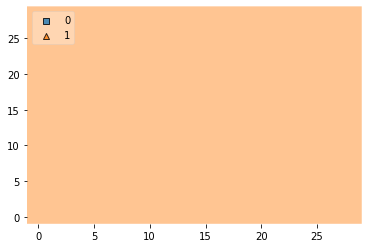

In [69]:
value = 1.5
width = 0.75

fig, ax = plt.subplots()

plot_decision_regions(x_train.values, y_train.values, clf=model_svm_nl,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value, 10: value,
                                            11: value, 12: value, 13: value, 14: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width, 10: width,
                                            11: width, 12: width, 13: width, 14: width},
                      legend=2, ax=ax)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

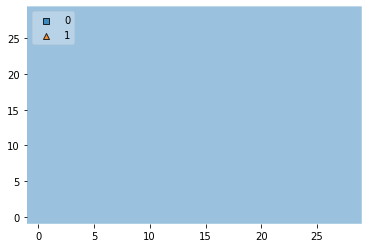

In [70]:
value = 1.5
width = 0.75

fig, ax = plt.subplots()

plot_decision_regions(x_train.values, y_train.values, clf=model_svm,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value, 10: value,
                                            11: value, 12: value, 13: value, 14: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width, 10: width,
                                            11: width, 12: width, 13: width, 14: width},
                      legend=2, ax=ax)

In [71]:
from sklearn.decomposition import PCA

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
norm = MinMaxScaler()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

In [74]:
x_train_norm

array([[0.02982143, 0.04087719, 0.        , ..., 0.        , 0.        ,
        0.05      ],
       [0.10714286, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08      ],
       [0.02089286, 0.00438596, 0.        , ..., 0.        , 0.        ,
        0.12      ],
       ...,
       [0.55357143, 0.01754386, 0.        , ..., 0.        , 0.        ,
        0.06      ],
       [0.03875   , 0.03508772, 0.        , ..., 0.        , 0.        ,
        0.14      ],
       [0.71428571, 0.61403509, 0.13432836, ..., 1.        , 0.        ,
        0.        ]])

In [75]:
x_test_norm

array([[0.10714286, 0.00140351, 0.        , ..., 1.        , 0.        ,
        0.08      ],
       [0.02375   , 0.05842105, 0.        , ..., 0.        , 0.        ,
        0.11      ],
       [0.39285714, 0.02333333, 0.        , ..., 0.        , 0.        ,
        0.05      ],
       ...,
       [0.09821429, 0.15789474, 0.        , ..., 0.        , 0.        ,
        0.08      ],
       [0.01928571, 0.00578947, 0.01492537, ..., 0.        , 0.        ,
        0.136     ],
       [0.08339286, 0.02631579, 0.        , ..., 0.        , 0.        ,
        0.09      ]])

In [76]:
pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(x_train_norm)
x_test2 = pca.fit_transform(x_test_norm)

In [77]:
rtrain,ctrain = x_train_norm.shape
print(rtrain,ctrain)

520 15


In [78]:
rtest,ctest = x_test_norm.shape
print(rtest,ctest)

131 15


In [79]:
x_train_norm.shape[0]

520

In [80]:
print(y_test.size)

131


In [81]:
x_train_norm.shape

(520, 15)

In [82]:
y_train.shape

(520,)

In [83]:
x_test_norm.shape

(131, 15)

In [84]:
y_test.shape

(131,)

In [85]:
start_svm = time.time()
model_svm.fit(x_train_norm,y_train)
stop_svm = time.time()
y_pred_svm_nl = model_svm_nl.predict(x_test_norm)
accuracy_score(y_pred_svm_nl,y_test)

0.8931297709923665

In [86]:
print("Training time: ", stop_svm-start_svm)

Training time:  0.014958381652832031


In [87]:
x_train2

array([[ 0.29230696, -0.76207079],
       [ 1.18939357,  0.17318479],
       [ 1.2551213 ,  0.24954155],
       ...,
       [-0.17981628, -0.27045875],
       [ 1.20581935,  0.1687164 ],
       [-0.8819743 ,  0.50478664]])

In [88]:
model_svm_nl.fit(x_train2,y_train)
y_pred_svm_nl = model_svm_nl.predict(x_test2)
accuracy_score(y_pred_svm_nl,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7786259541984732

In [89]:
model_rf.fit(x_train2,y_train)
y_pred_rf = model_rf.predict(x_test2)
accuracy_score(y_pred_rf,y_test)

0.6946564885496184

<AxesSubplot:>

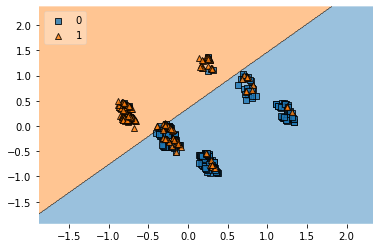

In [90]:
plot_decision_regions(x_train2, y_train.values, clf=model_svm_nl, legend=2)

In [91]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [92]:
model_sgd.fit(x_train_norm,y_train)
y_pred_sgd = model_sgd.predict(x_test_norm)
accuracy_score(y_pred_sgd,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8473282442748091

In [93]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
model_gdc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [94]:
model_gdc.fit(x_train_norm,y_train)
y_pred_gdc = model_gdc.predict(x_test_norm)
accuracy_score(y_pred_gdc,y_test)

0.8778625954198473

In [95]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(15,), random_state=32)
model_mlp.fit(x_train_norm,y_train)
y_pred_mlp = model_mlp.predict(x_test_norm)
accuracy_score(y_pred_mlp,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8778625954198473

In [96]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(solver='adam',activation='relu', alpha=1e-5,hidden_layer_sizes=(2,3), random_state=10)
model_mlp.fit(x_train_norm,y_train)
y_pred_mlp_adam = model_mlp.predict(x_test_norm)
accuracy_score(y_pred_mlp_adam,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8854961832061069

In [97]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3,7), random_state=32)
model_mlp.fit(x_train_norm,y_train)
y_pred_mlp = model_mlp.predict(x_test_norm)
accuracy_score(y_pred_mlp,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8320610687022901

In [98]:
from sklearn.ensemble import AdaBoostClassifier
model_abc = AdaBoostClassifier(n_estimators=1000)

In [99]:
model_abc.fit(x_train_norm,y_train)
y_pred_abc = model_abc.predict(x_test_norm)
accuracy_score(y_pred_abc,y_test)

0.8854961832061069

In [100]:
plot_decision_regions(x_train_norm, y_train.values, clf=model_abc,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value, 10: value,
                                            11: value, 12: value, 13: value, 14: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width, 10: width,
                                            11: width, 12: width, 13: width, 14: width},
                      legend=2, ax=ax)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [101]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()

In [102]:
model_tree.fit(x_train_norm,y_train)
y_pred_tree = model_tree.predict(x_test_norm)
accuracy_score(y_pred_tree,y_test)

0.8091603053435115

In [128]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100)
start_xgb = time.time()
model_xgb.fit(x_train_norm,y_train)
stop_xbg = time.time()
y_pred_xgb = model_xgb.predict(x_test_norm)
accuracy_score(y_pred_xgb,y_test)

0.9007633587786259

In [104]:
print("Training time: ", stop_xbg-start_xgb)

Training time:  0.35600733757019043


In [105]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [106]:
print(f1_score(y_pred_svm_nl,y_test))

0.7387387387387387


In [107]:
print(f1_score(y_pred_xgb,y_test))

0.8960000000000001


In [108]:
print(f1_score(y_pred_mlp_adam,y_test))

0.8818897637795275


In [109]:
print(precision_score(y_pred_svm_nl,y_test))
print(precision_score(y_pred_xgb,y_test))
print(precision_score(y_pred_mlp_adam,y_test))

0.6833333333333333
0.9333333333333333
0.9333333333333333


In [110]:
print(recall_score(y_pred_svm_nl,y_test))
print(recall_score(y_pred_xgb,y_test))
print(recall_score(y_pred_mlp_adam,y_test))

0.803921568627451
0.8615384615384616
0.835820895522388


In [111]:
tn, fp, fn, tp = confusion_matrix(y_pred_svm_nl,y_test).ravel()
FPR = fp/(fp+tn)
print(FPR*100)

23.75


In [112]:
tn, fp, fn, tp = confusion_matrix(y_pred_xgb,y_test).ravel()
FPR = fp/(fp+tn)
print(FPR*100)

6.0606060606060606


In [113]:
tn, fp, fn, tp = confusion_matrix(y_pred_mlp,y_test).ravel()
FPR = fp/(fp+tn)
print(FPR*100)

15.492957746478872
